<a href="https://colab.research.google.com/github/ahcamachod/1864-regresion-implementa-una-red-neuronal-con-numpy/blob/proyecto-final/RRN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión con Redes Neuronales 

##### Mediante este curso de regresión con redes neuronales utilizando Numpy estaremos creando una proyecto que nos ayude a determinar el número de bicicletas alquiladas con base en el clima y la temperatura.

El dataset utilizado como referencia se encuentra en: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

## 1.1 Conociendo el Dataset

In [1]:
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
files.upload()

Saving Bicicletas.csv to Bicicletas (1).csv


{'Bicicletas.csv': b'clima,temperatura,bicicletas_alquiladas\r\n2,0.363625,985\r\n2,0.35373899999999997,801\r\n1,0.189405,1349\r\n1,0.21212199999999998,1562\r\n1,0.22926999999999997,1600\r\n1,0.23320900000000003,1606\r\n2,0.208839,1510\r\n2,0.162254,959\r\n1,0.116175,822\r\n1,0.15088800000000002,1321\r\n2,0.19146400000000002,1263\r\n1,0.160473,1162\r\n1,0.150883,1406\r\n1,0.188413,1421\r\n2,0.248112,1248\r\n1,0.234217,1204\r\n2,0.176771,1000\r\n2,0.23233299999999998,683\r\n2,0.29842199999999997,1650\r\n2,0.25505,1927\r\n1,0.157833,1543\r\n1,0.0790696,981\r\n1,0.09883910000000001,986\r\n1,0.11793,1416\r\n2,0.234526,1985\r\n3,0.2036,506\r\n1,0.2197,431\r\n2,0.22331700000000002,1167\r\n1,0.212126,1098\r\n1,0.250322,1096\r\n2,0.18625,1501\r\n2,0.23453000000000002,1360\r\n2,0.254417,1526\r\n1,0.177878,1550\r\n2,0.22858699999999998,1708\r\n2,0.243058,1005\r\n1,0.291671,1623\r\n1,0.303658,1712\r\n1,0.198246,1530\r\n2,0.144283,1605\r\n1,0.14954800000000001,1538\r\n1,0.213509,1746\r\n1,0.232954

In [3]:
datos = pd.read_csv('Bicicletas.csv')
datos.head()

,clima,temperatura,bicicletas_alquiladas
0,2,0.363625,985
1,2,0.353739,801
2,1,0.189405,1349
3,1,0.212122,1562
4,1,0.229270,1600


In [4]:
datos.shape

(731, 3)

In [5]:
datos.clima.value_counts()

1    463
2    247
3     21
Name: clima, dtype: int64

## 1.2 Visualizando y Normalizando los datos

Text(0, 0.5, 'Bicicletas Alquiladas')

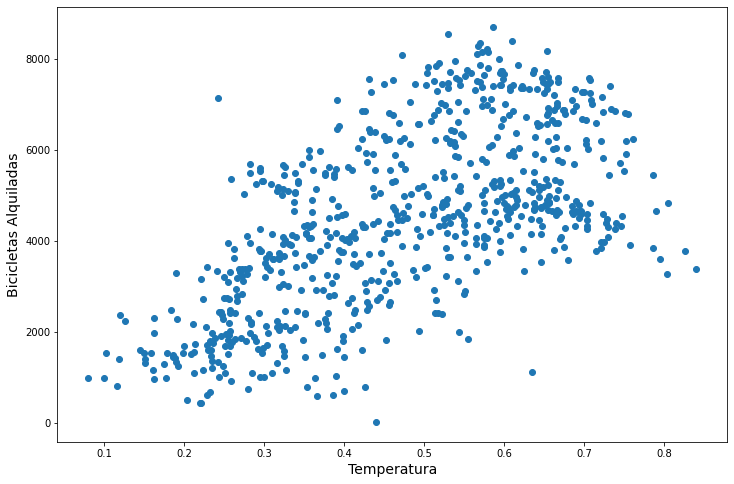

In [6]:
plt.figure(figsize=[12,8])
plt.scatter(datos.temperatura, datos.bicicletas_alquiladas)
plt.xlabel('Temperatura', fontsize = 14)
plt.ylabel('Bicicletas Alquiladas', fontsize = 14)

Text(0, 0.5, 'Bicicletas Alquiladas')

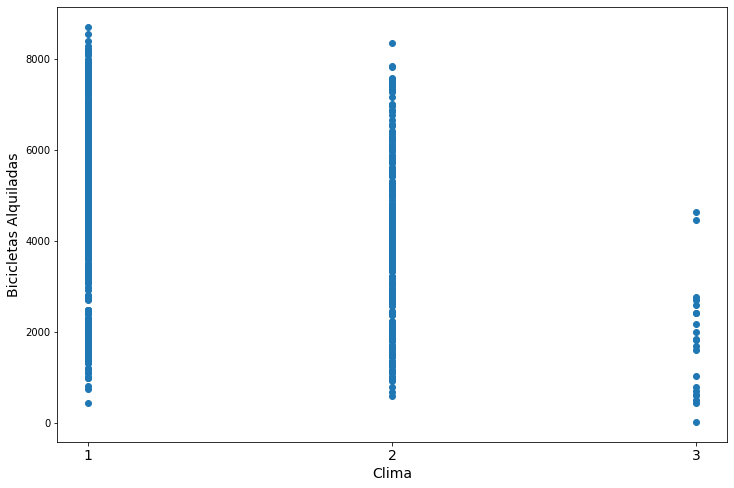

In [7]:
plt.figure(figsize=[12,8])
plt.scatter(datos.clima, datos.bicicletas_alquiladas)
plt.xlabel('Clima', fontsize = 14)
indice = [1,2,3]
plt.xticks(indice, fontsize = 14)
plt.ylabel('Bicicletas Alquiladas', fontsize = 14)

In [8]:
X = datos[['clima','temperatura']].values
y = datos['bicicletas_alquiladas'].values
print(X[0:5], y[0:5])

[[2.       0.363625]
 [2.       0.353739]
 [1.       0.189405]
 [1.       0.212122]
 [1.       0.22927 ]] [ 985  801 1349 1562 1600]


In [9]:
X = X/np.amax(X, axis=0)
ymax = np.amax(y)
y = y/ymax
print(X[0:5], y[0:5])

[[0.66666667 0.43242565]
 [0.66666667 0.42066914]
 [0.33333333 0.22524188]
 [0.33333333 0.25225712]
 [0.33333333 0.27264965]] [0.11303649 0.09192105 0.15480835 0.17925178 0.18361258]


## 2.1 Funciones de Activación y Arquitectura de la red

In [10]:
def sigmoid(suma):
  return 1/(1+np.exp(-suma))

def relu(suma):
  return np.maximum(0,suma)

In [11]:
arquitectura= [{"dim_in":2, "dim_out":50, "activacion": "relu"},
               {"dim_in":50, "dim_out":1, "activacion": "sigmoid"}]

In [12]:
def inicia_capas(arquitectura, seed=99):
  np.random.seed(seed)
  numero_de_capas= len(arquitectura)
  valores_parametros={}
  for indice, capa in enumerate(arquitectura):
    indice_capa= indice+1
    tamano_capa_in= capa["dim_in"]
    tamano_capa_out= capa["dim_out"]
    valores_parametros["P"+str(indice_capa)] = np.random.randn(tamano_capa_out, tamano_capa_in)*0.1
    valores_parametros["b"+str(indice_capa)] = np.random.randn(tamano_capa_out, 1)*0.1
  return valores_parametros

## 2.2 Propagación de Red

In [13]:
def propaga_una_capa(activacion_anterior, pesos_actual, b_actual, activacion="relu"):
  output_actual = np.dot(pesos_actual,activacion_anterior)+b_actual
  if activacion is "relu":
    func_activacion = relu
  elif activacion is "sigmoid":
    func_activacion = sigmoid
  else:
    raise Exception("Funcion no implementada.")
  return func_activacion(output_actual), output_actual

In [14]:
def propaga_total(X, valores_parametros, arquitectura):
  memoria = {}
  activacion_actual = X

  for indice, capa in enumerate(arquitectura):
    indice_capa = indice + 1
    activacion_anterior = activacion_actual
    func_activacion_actual = capa["activacion"]
    pesos_actual = valores_parametros["P" + str(indice_capa)]
    b_actual = valores_parametros["b"+ str(indice_capa)]
    activacion_actual, output_actual = propaga_una_capa(activacion_anterior, 
                                                        pesos_actual, b_actual, 
                                                        func_activacion_actual)
    memoria["A"+str(indice)] = activacion_anterior
    memoria["Z"+str(indice_capa)] = output_actual
  return activacion_actual, memoria

## 2.3 Probando la red

In [15]:
valores_parametros = inicia_capas(arquitectura, seed=99)
y_estimado, memoria = propaga_total(np.transpose(X), valores_parametros,
                                    arquitectura)

In [16]:
y_estimado[0,0]*ymax

4579.982967258466

In [17]:
y[0]*ymax

985.0000000000001

## 3.1 Actualización de pesos y función de costo


In [18]:
def actualiza(valores_parametros, gradientes, arquitectura, tasa_aprendizaje):

    # iteraciones por las capas
    for indice_capa, capa in enumerate(arquitectura, 1):
        valores_parametros["P" + str(indice_capa)] -= tasa_aprendizaje * gradientes["dP" + str(indice_capa)]        
        valores_parametros["b" + str(indice_capa)] -= tasa_aprendizaje * gradientes["db" + str(indice_capa)]

    return valores_parametros;

In [19]:
def valor_costo(Y_estimado, Y):
    # número_de_muestras
    m = Y_estimado.shape[1]
    
    costo = -1 / m * (np.dot(Y, np.log(Y_estimado).T) + np.dot(1 - Y, np.log(1 - Y_estimado).T))
    return np.squeeze(costo)

## 4.1 Retropropagación

In [20]:
def retropropagacion_total(Y_estimado, Y, memoria, valores_parametros, arquitectura):
   
    gradientes = {}
    
    # número de muestras
    #m = Y.shape[1]
    # Asegurar que los 2 vectores tengan la misma dimensión
    Y = Y.reshape(Y_estimado.shape)
    
    # inicia el algoritmo de gradiente descendiente
    dActivacion_anterior = - (np.divide(Y, Y_estimado) - np.divide(1 - Y, 1 - Y_estimado));
    
    for indice_capa_anterior, capa in reversed(list(enumerate(arquitectura))):
        
        indice_capa_actual = indice_capa_anterior + 1

        # Función de activacion para la capa actual
        func_activacion_actual = capa["activacion"]
        
        dActivacion_actual = dActivacion_anterior
        
        activacion_anterior = memoria["A" + str(indice_capa_anterior)]
        output_actual = memoria["Z" + str(indice_capa_actual)]
        
        pesos_actual = valores_parametros["P" + str(indice_capa_actual)]
        b_actual = valores_parametros["b" + str(indice_capa_actual)]
        
        dActivacion_anterior, dPesos_actual, db_actual = retropropagacion_una_capa(
            dActivacion_actual, pesos_actual, b_actual, output_actual, activacion_anterior, func_activacion_actual)
        
        gradientes["dP" + str(indice_capa_actual)] = dPesos_actual
        gradientes["db" + str(indice_capa_actual)] = db_actual
    
    return gradientes

In [21]:
def sigmoid_retro(dActivacion, output):
    sig = sigmoid(output)
    return dActivacion * sig * (1 - sig)

def relu_retro(dActivacion, output):
    dOutput = np.array(dActivacion, copy = True)
    dOutput[output <= 0] = 0;
    return dOutput

## 4.2 Retropropagación de una capa

In [22]:
def retropropagacion_una_capa(dActivacion_actual, pesos_actual, b_actual, output_actual, activacion_anterior, activacion="relu"):
    # número de muestras
    m = activacion_anterior.shape[1]
    
    # Seleccionar función de activación
    if activacion is "relu":
        func_activacion_retro = relu_retro
    elif activacion is "sigmoid":
        func_activacion_retro = sigmoid_retro
    else:
        raise Exception('Función no implementada.')
    
    # derivada de la función de activación
    dOutput_actual = func_activacion_retro(dActivacion_actual, output_actual)    
    # derivada de la matriz de Pesos
    dPesos_actual = np.dot(dOutput_actual, activacion_anterior.T) / m
    # derivada del vector de bias 
    db_actual = np.sum(dOutput_actual, axis=1, keepdims=True) / m
    # derivada de la matriz de activación anterior
    dActivacion_anterior = np.dot(pesos_actual.T, dOutput_actual)

    return dActivacion_anterior, dPesos_actual, db_actual

## 5.1 Entrenando la red

In [23]:
def train(X, Y,X_test,Y_test, arquitectura, epocas, tasa_aprendizaje):
    # Inicia los parámetros de la red neuronal
    valores_parametros = inicia_capas(arquitectura, 2)
    # Listas que almacenarán el aprendizaje de la red 
    historia_costo = []
    historia_costo_test = []
   
    
    # Actualiza en cada época
    for i in range(epocas):
        # Propagación de la red - Forward propagation
        Y_estimado, memoria = propaga_total(X, valores_parametros, arquitectura)
        
        Y_estimado_test, memoria2 = propaga_total(X_test, valores_parametros, 
                                                  arquitectura)
        
        # calcula as métricas e salva nas listas de história
        costo = valor_costo(Y_estimado, Y)
        historia_costo.append(costo)
        costo_test = valor_costo(Y_estimado_test, Y_test)
        historia_costo_test.append(costo_test)
        
        
        # Retropropagación - Backpropagation
        gradientes = retropropagacion_total(Y_estimado, Y, memoria, 
                                           valores_parametros, arquitectura)
        # Actualizar los pesos
        valores_parametros = actualiza(valores_parametros, gradientes, 
                                      arquitectura, tasa_aprendizaje)
        
        if(i % 50 == 0):
            
            print(f'Iteración: {i:05} - Costo: {costo:.5f}')
            
            
    return valores_parametros, historia_costo, historia_costo_test

In [24]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.43, random_state=42)

In [25]:
valores_parametros, historia_costo, historia_costo_test = train(np.transpose(X_train), np.transpose(y_train.reshape((y_train.shape[0], 1))), 
                                                                  np.transpose(X_test), np.transpose(y_test.reshape((y_test.shape[0], 1))), 
                                                                  arquitectura, 20000, 0.01)

Iteración: 00000 - Costo: 0.69396
Iteración: 00050 - Costo: 0.69246
Iteración: 00100 - Costo: 0.69136
Iteración: 00150 - Costo: 0.69054
Iteración: 00200 - Costo: 0.68991
Iteración: 00250 - Costo: 0.68939
Iteración: 00300 - Costo: 0.68894
Iteración: 00350 - Costo: 0.68852
Iteración: 00400 - Costo: 0.68812
Iteración: 00450 - Costo: 0.68773
Iteración: 00500 - Costo: 0.68735
Iteración: 00550 - Costo: 0.68700
Iteración: 00600 - Costo: 0.68667
Iteración: 00650 - Costo: 0.68635
Iteración: 00700 - Costo: 0.68605
Iteración: 00750 - Costo: 0.68575
Iteración: 00800 - Costo: 0.68545
Iteración: 00850 - Costo: 0.68515
Iteración: 00900 - Costo: 0.68485
Iteración: 00950 - Costo: 0.68455
Iteración: 01000 - Costo: 0.68424
Iteración: 01050 - Costo: 0.68394
Iteración: 01100 - Costo: 0.68363
Iteración: 01150 - Costo: 0.68333
Iteración: 01200 - Costo: 0.68302
Iteración: 01250 - Costo: 0.68271
Iteración: 01300 - Costo: 0.68239
Iteración: 01350 - Costo: 0.68208
Iteración: 01400 - Costo: 0.68176
Iteración: 014

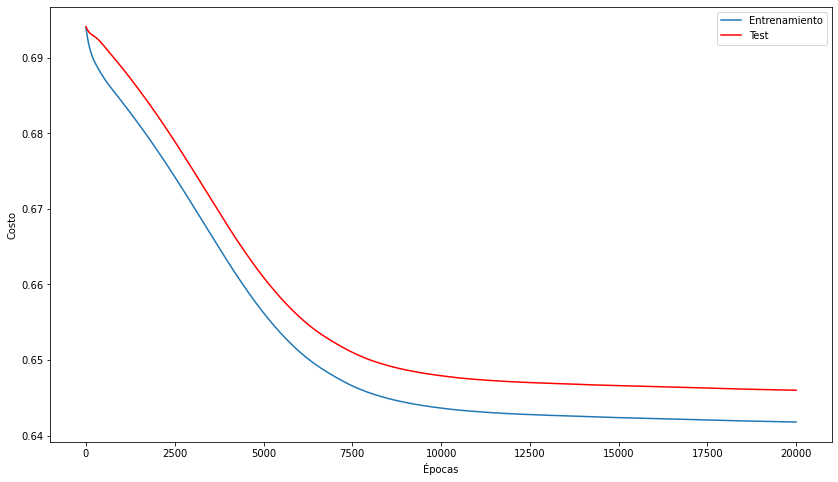

In [26]:
plt.figure(figsize=[14,8])
plt.plot(historia_costo)
plt.plot(historia_costo_test, 'r')
plt.legend(['Entrenamiento','Test'])
plt.ylabel('Costo')
plt.xlabel('Épocas')
plt.show()

## 5.2 Realizando Previsiones

In [27]:
# Previsión
Y_pred, _ = propaga_total(np.transpose(X_test), valores_parametros, arquitectura)

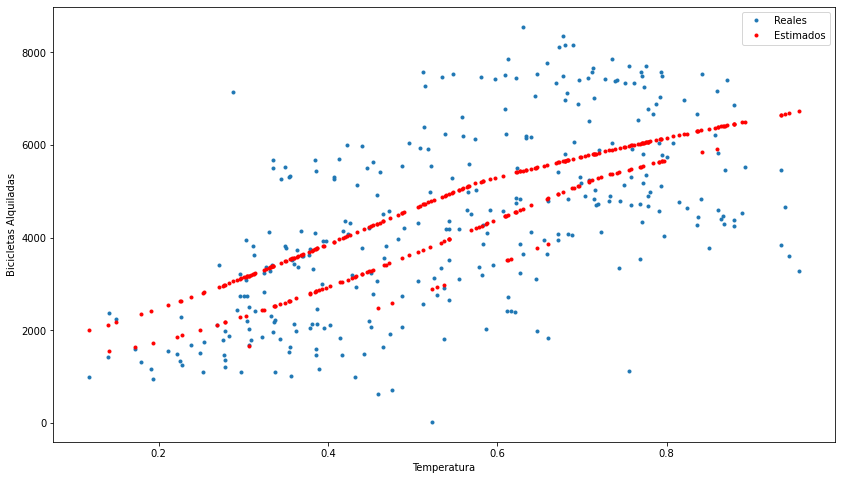

In [28]:
plt.figure(figsize=[14,8])
plt.plot(np.transpose(X_test)[1],ymax*y_test,'.')
plt.plot(np.transpose(X_test)[1],ymax*Y_pred.reshape([-1,1]),'.r')
plt.legend(['Reales','Estimados'])
plt.ylabel('Bicicletas Alquiladas')
plt.xlabel('Temperatura')
plt.show()

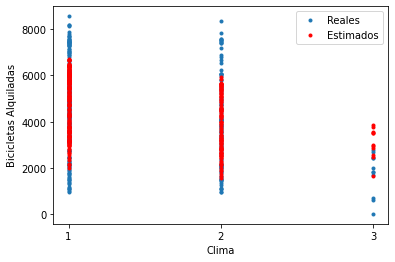

In [29]:
plt.plot(3*np.transpose(X_test)[0],ymax*y_test,'.')
plt.plot(3*np.transpose(X_test)[0],ymax*Y_pred.reshape([-1,1]),'.r')
plt.legend(['Reales','Estimados'])
plt.ylabel('Bicicletas Alquiladas')
plt.xlabel('Clima')
indice=[1,2,3]
plt.xticks(indice)
plt.show()